In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [2]:
def show_with_plt(img, title):

    #convert BGR to RGB
    img_RGB = img[:,:, ::-1]

    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

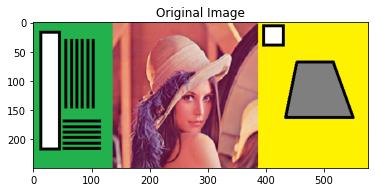

In [3]:
image = cv2.imread("images/lena_image.png")

show_with_plt(image, "Original Image")

##### Scaling or Resizing

In [5]:
#scaling factor is 0.5 in every direction

dst_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

In [8]:
#getting the height and width of the image and RESIZING with it

height, width = image.shape[:2]
dst_image_2 = cv2.resize(image, (width * 2, height *2), interpolation=cv2.INTER_LINEAR)

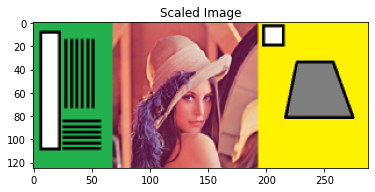

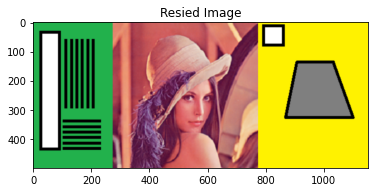

In [9]:
#plotting scaled and resized image 

show_with_plt(dst_image, "Scaled Image")
show_with_plt(dst_image_2, "Resied Image")

__Interpolation__ Methods :

 - ``cv2.INTER_NEAREST`` - It doesn't count weighted average, just find the _nearest_ pixel value and assume its intensity

 - ``cv2.INTER_LINEAR`` - _default_ - performs bilinear interpolation. Can be used in both cases (a)shrinkage (b)enlargement

 - ``cv2.INTER_AREA`` - usually used for enlargement

 - ``cv2.INTER_CUBIC`` - enlargement, operates over _4 × 4_ pixel neighbour

 - ``cv2.INTER_LANCZOS4`` - operates over _8 × 8_ pixel neighbour

##### Translation

In [10]:
#Translating in the X direction 200 pixels, and in Y direction 30 pixels

M = np.float32([[1, 0, 200], [0,1, 30]])

##### ``cv2.wrapAffine``

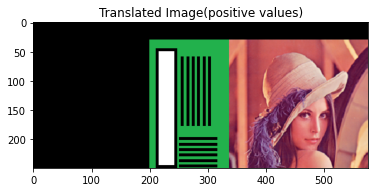

In [11]:
dst_image = cv2.warpAffine(image, M, (width, height))

show_with_plt(dst_image, "Translated Image(positive values)")



###### Translation can also take negative values

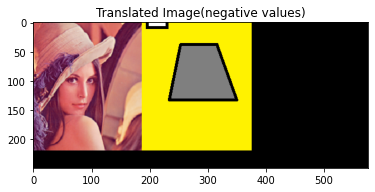

In [13]:
M = np.float32([[1, 0, -200],[0,1,-30]])

dst_image = cv2.warpAffine(image, M, (width, height))
show_with_plt(dst_image, "Translated Image(negative values)")

#### Rotation

###### We need to use ``cv2.getRotationMatrix2D()``

In [15]:
#Rotating 180 degrees (upside down)

M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)

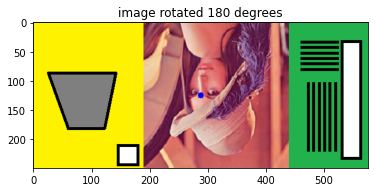

In [19]:
dst_image = cv2.warpAffine(image, M, (width, height))

#show the center of rotation and the rotated image
cv2.circle(dst_image, (round(width / 2.0), round(height / 2.0)), 5, (255, 0, 0), -1)

show_with_plt(dst_image,"image rotated 180 degrees")

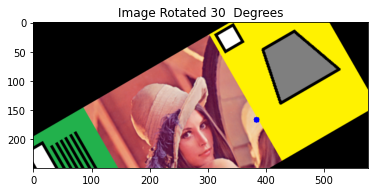

In [22]:
#ROTATING 30 Degree

M = cv2.getRotationMatrix2D((width /1.5, height /1.5), 30, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

#show the center of rotation and rotated image
cv2.circle(dst_image, (round(width /1.5), round(height/1.5)),5, (255, 0,0), -1)

show_with_plt(dst_image, "Image Rotated 30  Degrees")

#### Affine Transformation

An affine transformation is a transformation where points, straight lines, and planes
are preserved. Additionally, the parallel lines will remain parallel after this
transformation. However, an affine transformation does not preserve both the distance
and angles between points.

##### ``cv2.getAffineTransform`` is used to build the _2 × 3_ transformation matrix, which is obtained from the relation between points from the input image, and their corresponding coordinates in the transformed image

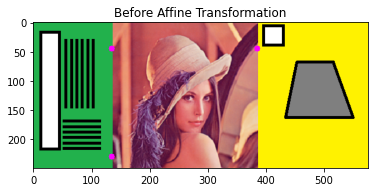

In [24]:
image_points = image.copy()

cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)


#Getting the image with three created points

show_with_plt(image_points, "Before Affine Transformation")

In [25]:
#Creating the arrays with the aforementioned three points and the desired poistion in the output image

pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])

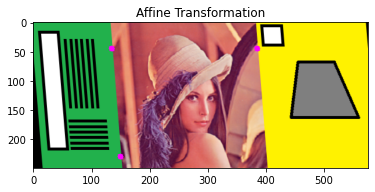

In [26]:
#Creating Affine based on above points 

M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

show_with_plt(dst_image, "Affine Transformation")

##### Perspective Transformation

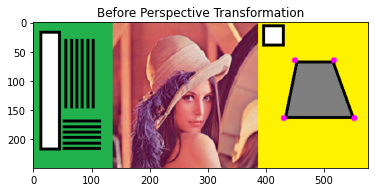

In [27]:
#A copy of the image is created to show the points that will be used for the perspective transformation

image_points = image.copy()
cv2.circle(image_points, (450, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (517, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (431, 164), 5, (255, 0, 255), -1)
cv2.circle(image_points, (552, 164), 5, (255, 0, 255), -1)


show_with_plt(image_points, "Before Perspective Transformation")

``cv2.getPerspectiveTransform`` need four pairs of points (co-ordinates of a quadrangle in both the source and output image)

In [28]:
#Creating the array for these four pairs of points

pts_1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])

pts_2 = np.float32([[0,0], [300,0], [0,300],[300,300]])

In [29]:
M = cv2.getPerspectiveTransform(pts_1, pts_2)

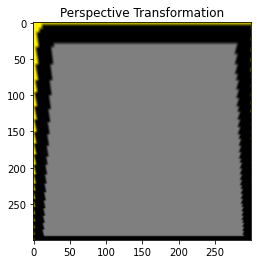

In [30]:
dst_image = cv2.warpPerspective(image, M, (300,300))

show_with_plt(dst_image, "Perspective Transformation")

##### Cropping

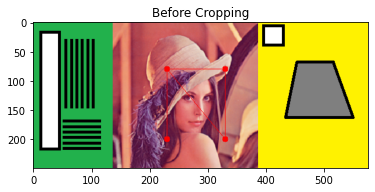

In [32]:
image_points = image.copy()

#Creating the points and lines connecting the points

cv2.circle(image_points, (230, 80), 5, (0,0,255), -1)
cv2.circle(image_points, (330,80), 5, (0,0,255), -1)
cv2.circle(image_points, (230, 200), 5, (0,0,255), -1)
cv2.circle(image_points, (330, 200), 5, (0,0,255), -1)

cv2.line(image_points, (230, 80), (330, 80), (0,0,255))
cv2.line(image_points, (230, 80), (330, 200), (0,0,255))
cv2.line(image_points, (230, 80), (230, 200), (0,0,255))
cv2.line(image_points, (330,200), (330, 80), (0,0,255))

show_with_plt(image_points, "Before Cropping")

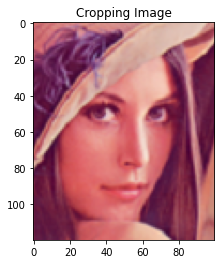

In [33]:
#For cropping, use Numpy slicing

dst_image = image[80:200, 230:330]

show_with_plt(dst_image, "Cropping Image")